In [1]:
import requests
import pandas as pd
import numpy as np
import random
import seaborn as sns
import matplotlib.pyplot as plt
from fancyimpute import IterativeImputer
import joblib

In [2]:
'''pip install tensorflowjs'''

'pip install tensorflowjs'

In [3]:
data = pd.read_csv('accepted_2007_to_2018Q4.csv')

C:\Users\Vinay\AppData\Local\Temp\ipykernel_15688\2567533633.py:1: DtypeWarning: Columns (0,19,49,59,118,129,130,131,134,135,136,139,145,146,147) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('accepted_2007_to_2018Q4.csv')


In [4]:
data.columns

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade',
       ...
       'hardship_payoff_balance_amount', 'hardship_last_payment_amount',
       'disbursement_method', 'debt_settlement_flag',
       'debt_settlement_flag_date', 'settlement_status', 'settlement_date',
       'settlement_amount', 'settlement_percentage', 'settlement_term'],
      dtype='object', length=151)

In [5]:
data = data.loc[:, ['loan_amnt', 'term', 'int_rate', 'installment', 'grade', 'sub_grade', 'emp_title', 'emp_length', 'home_ownership', 'annual_inc',\
                    'verification_status', 'issue_d', 'loan_status', 'purpose', 'title', 'zip_code', 'addr_state', 'dti', 'earliest_cr_line', 'open_acc',\
                    'pub_rec', 'revol_bal', 'revol_util', 'total_acc', 'initial_list_status', 'application_type', 'mort_acc', 'pub_rec_bankruptcies']]

In [6]:
data = data[data['loan_status'].isin(['Fully Paid', 'Charged Off'])]

In [7]:
data.head()

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,...,earliest_cr_line,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies
0,3600.0,36 months,13.99,123.03,C,C4,leadman,10+ years,MORTGAGE,55000.0,...,Aug-2003,7.0,0.0,2765.0,29.7,13.0,w,Individual,1.0,0.0
1,24700.0,36 months,11.99,820.28,C,C1,Engineer,10+ years,MORTGAGE,65000.0,...,Dec-1999,22.0,0.0,21470.0,19.2,38.0,w,Individual,4.0,0.0
2,20000.0,60 months,10.78,432.66,B,B4,truck driver,10+ years,MORTGAGE,63000.0,...,Aug-2000,6.0,0.0,7869.0,56.2,18.0,w,Joint App,5.0,0.0
4,10400.0,60 months,22.45,289.91,F,F1,Contract Specialist,3 years,MORTGAGE,104433.0,...,Jun-1998,12.0,0.0,21929.0,64.5,35.0,w,Individual,6.0,0.0
5,11950.0,36 months,13.44,405.18,C,C3,Veterinary Tecnician,4 years,RENT,34000.0,...,Oct-1987,5.0,0.0,8822.0,68.4,6.0,w,Individual,0.0,0.0


In [8]:
data.isnull().sum()

loan_amnt                   0
term                        0
int_rate                    0
installment                 0
grade                       0
sub_grade                   0
emp_title               85785
emp_length              78511
home_ownership              0
annual_inc                  0
verification_status         0
issue_d                     0
loan_status                 0
purpose                     0
title                   16660
zip_code                    1
addr_state                  0
dti                       374
earliest_cr_line            0
open_acc                    0
pub_rec                     0
revol_bal                   0
revol_util                857
total_acc                   0
initial_list_status         0
application_type            0
mort_acc                47281
pub_rec_bankruptcies      697
dtype: int64

# EDA

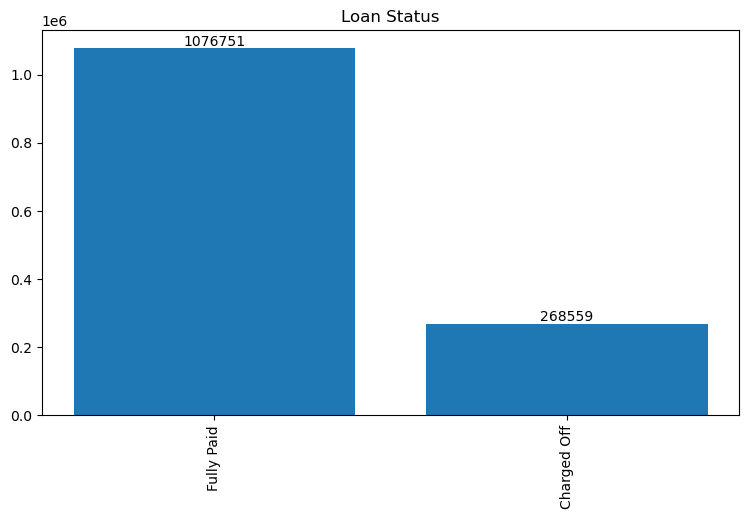

In [9]:
df = data.loan_status.value_counts()
plt.figure(figsize = (9, 5))
bar = plt.bar(df.index, df.values)
plt.bar_label(bar, df.values)
plt.xticks(rotation=90)

plt.title('Loan Status')
plt.show()

<Axes: >

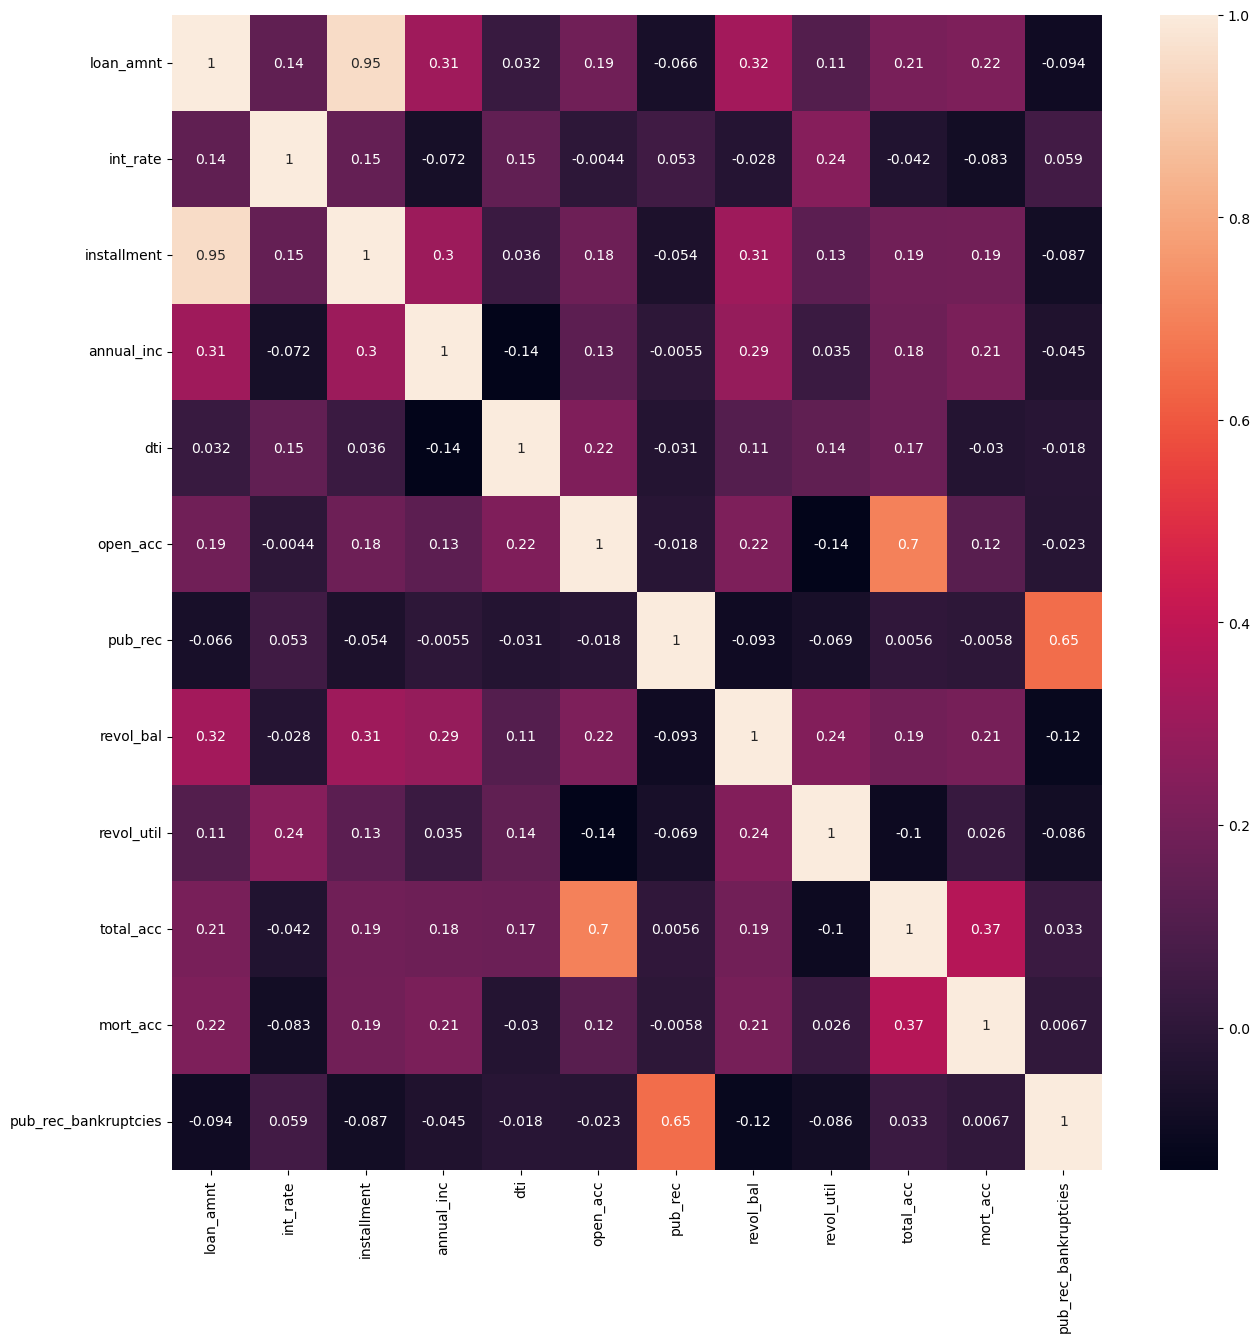

In [10]:
plt.figure(figsize = (15 ,15))
sns.heatmap(data.corr(numeric_only=True), annot = True)

There is a strong correlation between installment and loan amount

Text(0.5, 1.0, 'Installment by Loan Status')

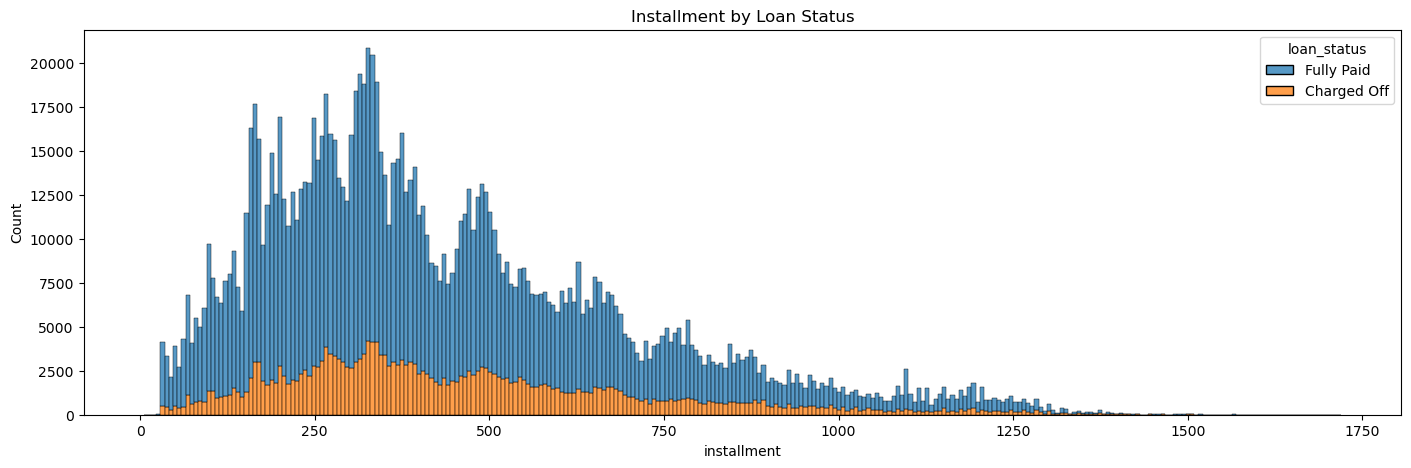

In [11]:
#loan amount by loanStatus
plt.figure(figsize = (17, 5))
sns.histplot(
    data,
    x="installment", hue = 'loan_status',
    multiple="stack",
)
plt.title('Installment by Loan Status')
#ax.xaxis.set_major_formatter(mpl.ticker.ScalarFormatter())

Text(0.5, 1.0, 'Loan Amount by Loan Status')

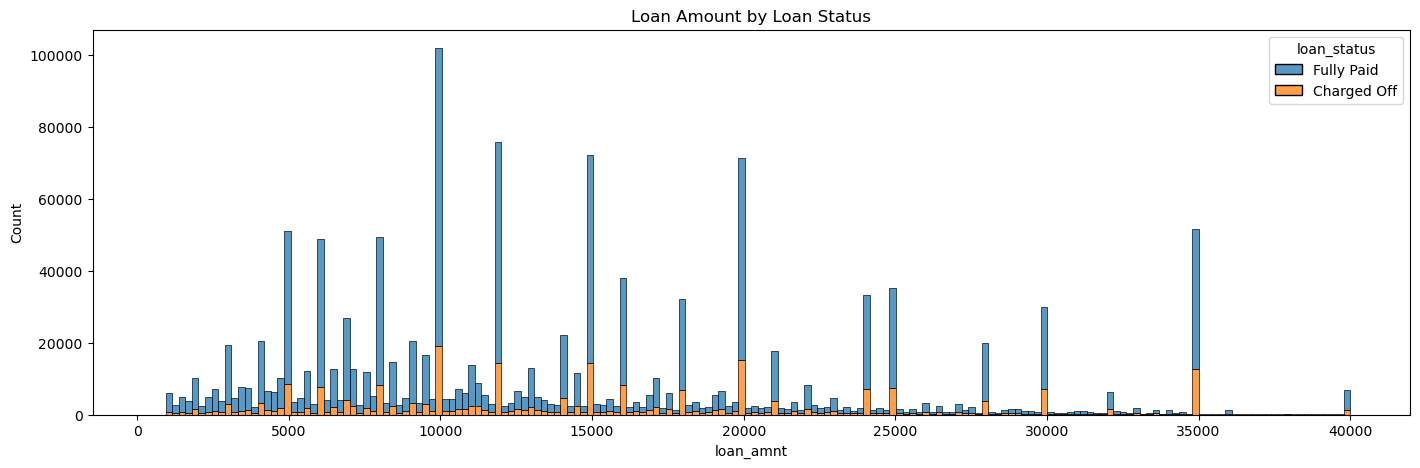

In [12]:
#loan amount by loanStatus
plt.figure(figsize = (17, 5))
sns.histplot(
    data,
    x="loan_amnt", hue = 'loan_status',
    multiple="stack",
)
plt.title('Loan Amount by Loan Status')
#ax.xaxis.set_major_formatter(mpl.ticker.ScalarFormatter())

(array([0, 1]), [Text(0, 0, 'Fully Paid'), Text(1, 0, 'Charged Off')])

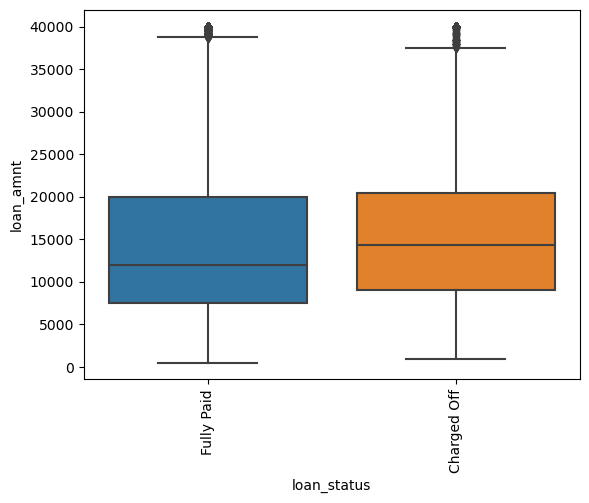

In [13]:
sns.boxplot(data = data, x = 'loan_status', y = 'loan_amnt')
plt.xticks(rotation = 90)

(array([0, 1]), [Text(0, 0, 'Fully Paid'), Text(1, 0, 'Charged Off')])

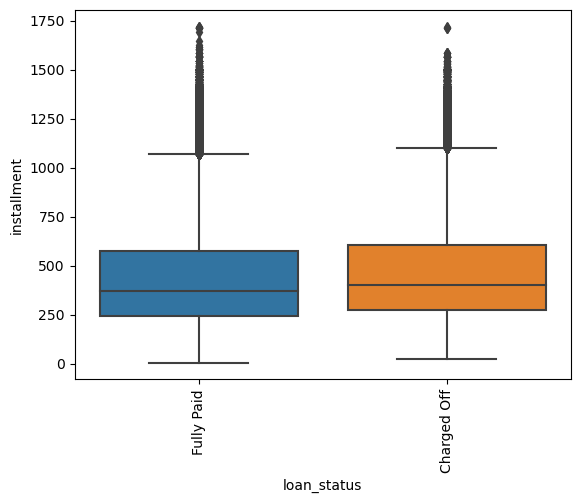

In [14]:
sns.boxplot(data = data, x = 'loan_status', y = 'installment')
plt.xticks(rotation = 90)

In [15]:
data.groupby(by='loan_status')['loan_amnt'].describe()

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
Charged Off,268559.0,15565.055444,8814.560077,900.0,9000.0,14350.0,20400.0,40000.0
Fully Paid,1076751.0,14134.369808,8669.028973,500.0,7500.0,12000.0,20000.0,40000.0


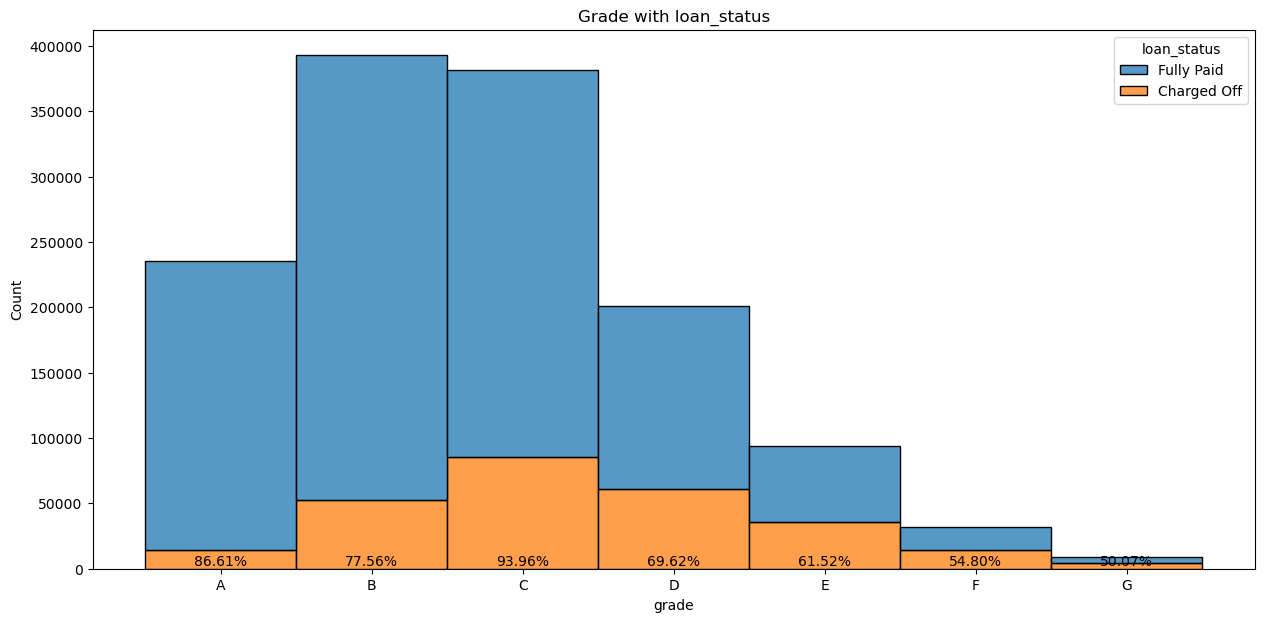

In [16]:
#grade and #subgrade
plt.figure(figsize = (15, 7))
df = data.sort_values(by = 'grade')

fully_paid_df = df[df['loan_status'] == 'Fully Paid']

percentage_fully_paid = (fully_paid_df['grade'].value_counts() / df['grade'].value_counts()) * 100

sns.histplot(data = df, x = 'grade', hue = 'loan_status', multiple = 'stack')
for i, p in enumerate(percentage_fully_paid):
    plt.text(i, p, f'{p:.2f}%', ha='center', va='bottom')

plt.title('Grade with loan_status')
plt.show()

we can see that the percentage of fully paid customer decreases as the grade decreases.

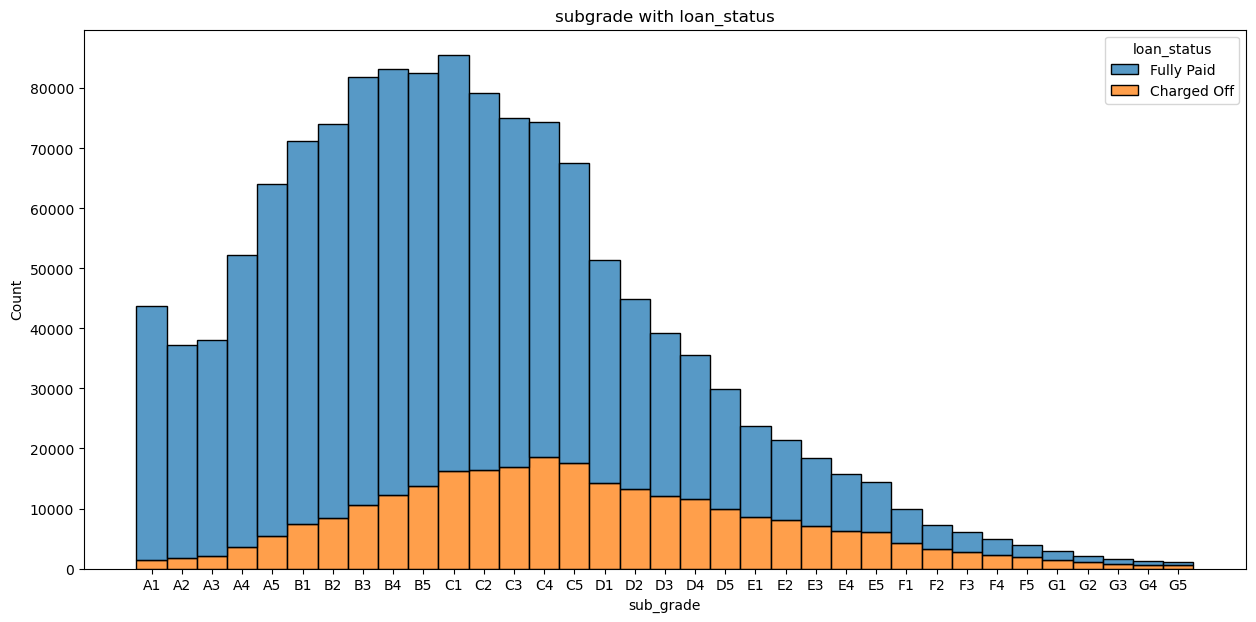

In [17]:
plt.figure(figsize = (15, 7))
df = data.sort_values(by = 'sub_grade')
sns.histplot(data = df, x = 'sub_grade', hue = 'loan_status', multiple = 'stack')
plt.title('subgrade with loan_status')
plt.show()

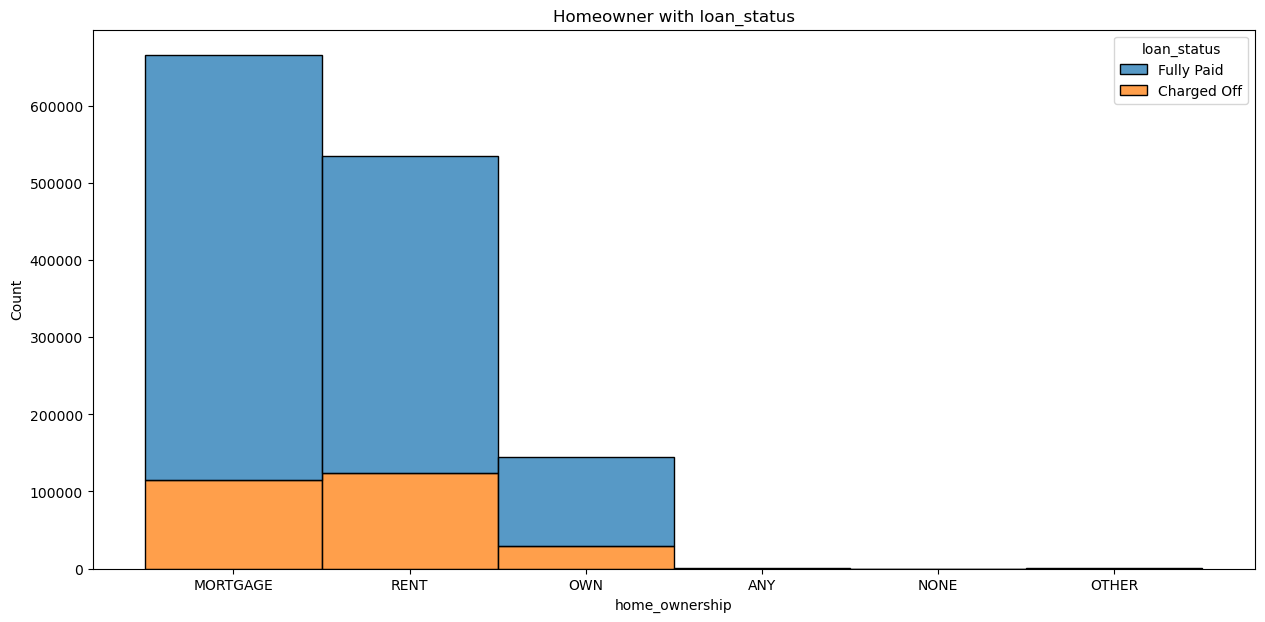

In [18]:
#lets find the loan status of home ownerships
plt.figure(figsize = (15, 7))
sns.histplot(data = data, x = 'home_ownership', hue = 'loan_status', multiple = 'stack')
plt.title('Homeowner with loan_status')
plt.show()

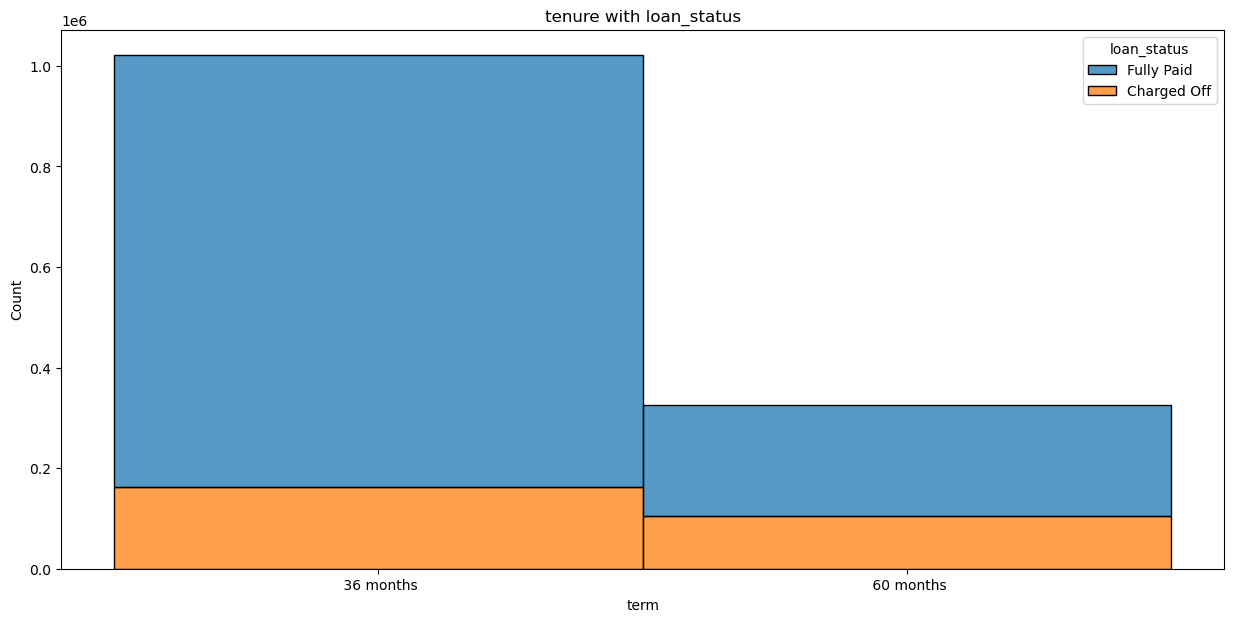

In [19]:
#lets find the loan status of tenure of loan
plt.figure(figsize = (15, 7))
sns.histplot(data = data, x = 'term', hue = 'loan_status', multiple = 'stack')
plt.title('tenure with loan_status')
plt.show()

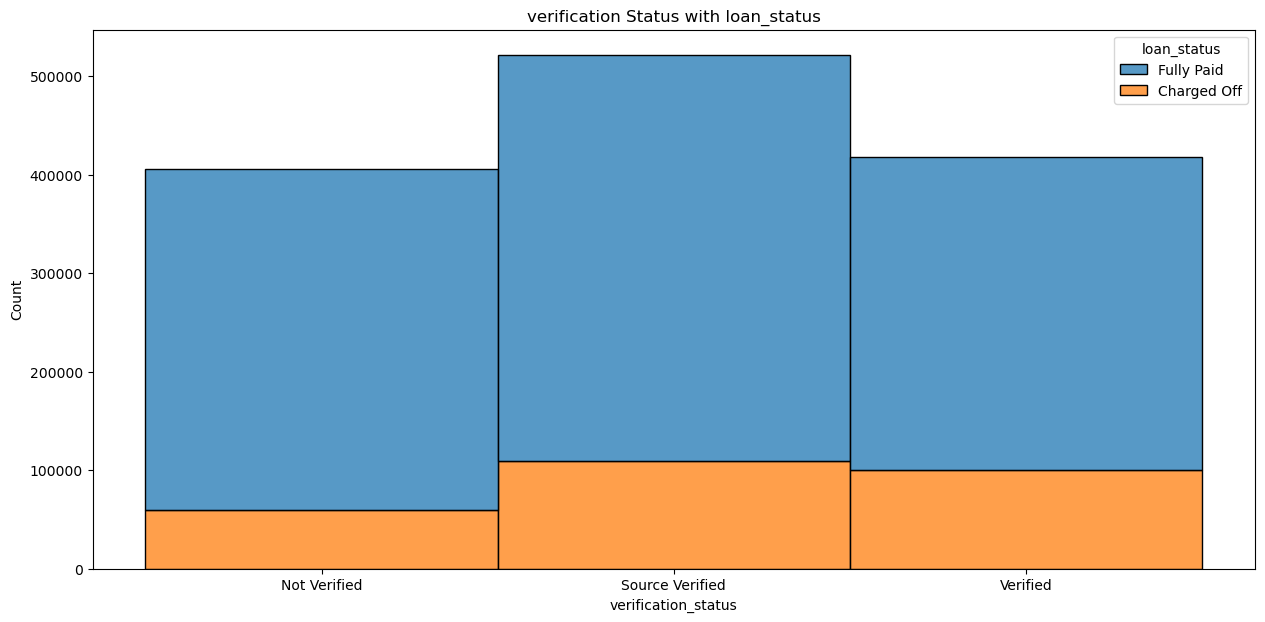

In [20]:
#lets find the loan status of verification
plt.figure(figsize = (15, 7))
sns.histplot(data = data, x = 'verification_status', hue = 'loan_status', multiple = 'stack')
plt.title('verification Status with loan_status')
plt.show()

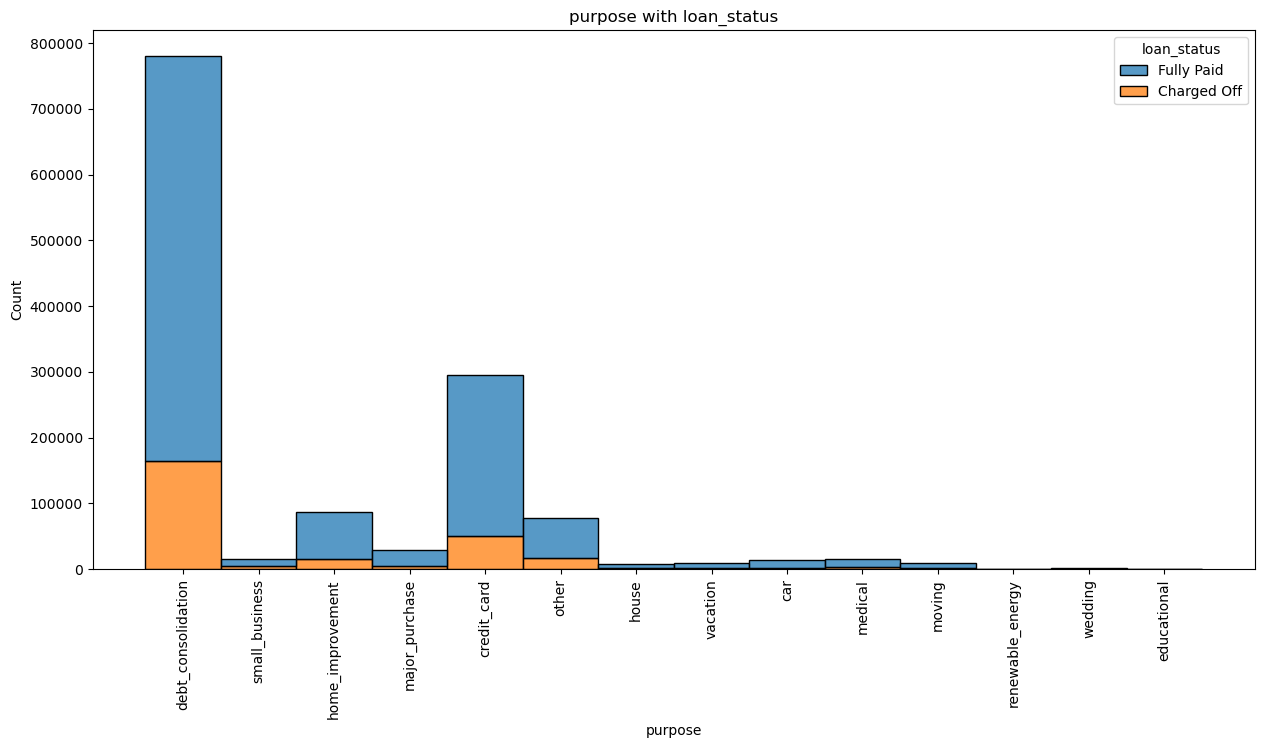

In [21]:
#lets find the loan status of purpose of loan
plt.figure(figsize = (15, 7))
sns.histplot(data = data, x = 'purpose', hue = 'loan_status', multiple = 'stack')
plt.xticks(rotation = 90)
plt.title('purpose with loan_status')
plt.show()

Text(0.5, 1.0, 'interest_rate with loan_status')

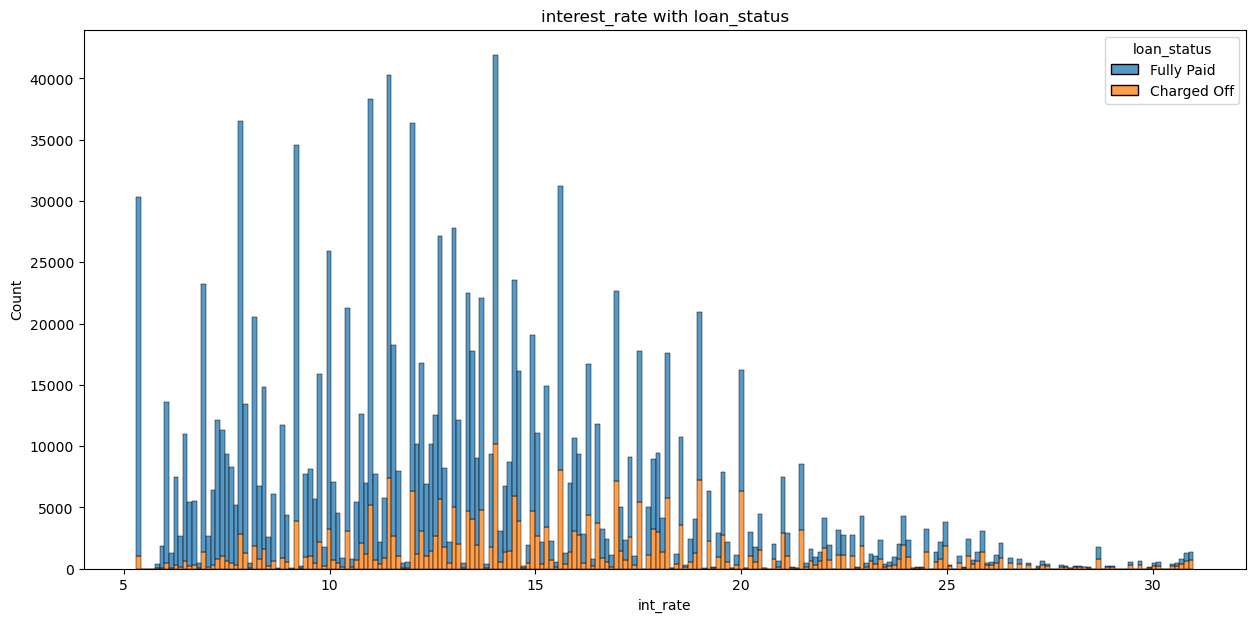

In [22]:
#lets find the loan status of interest rate
plt.figure(figsize = (15, 7))
sns.histplot(data = data, x = 'int_rate', hue = 'loan_status', multiple = 'stack')
plt.title('interest_rate with loan_status')

In [23]:
data.loc[data.annual_inc >= 1000000, 'loan_status'].value_counts()

loan_status
Fully Paid     294
Charged Off     45
Name: count, dtype: int64

In [24]:
data.loc[data.annual_inc >= 250000, 'loan_status'].value_counts()

loan_status
Fully Paid     14269
Charged Off     2214
Name: count, dtype: int64

% of charged off is higher (14%) with annual income greater than 250K vs 12% in income greater that 1 million.

Text(0.5, 1.0, 'dti with loan_status')

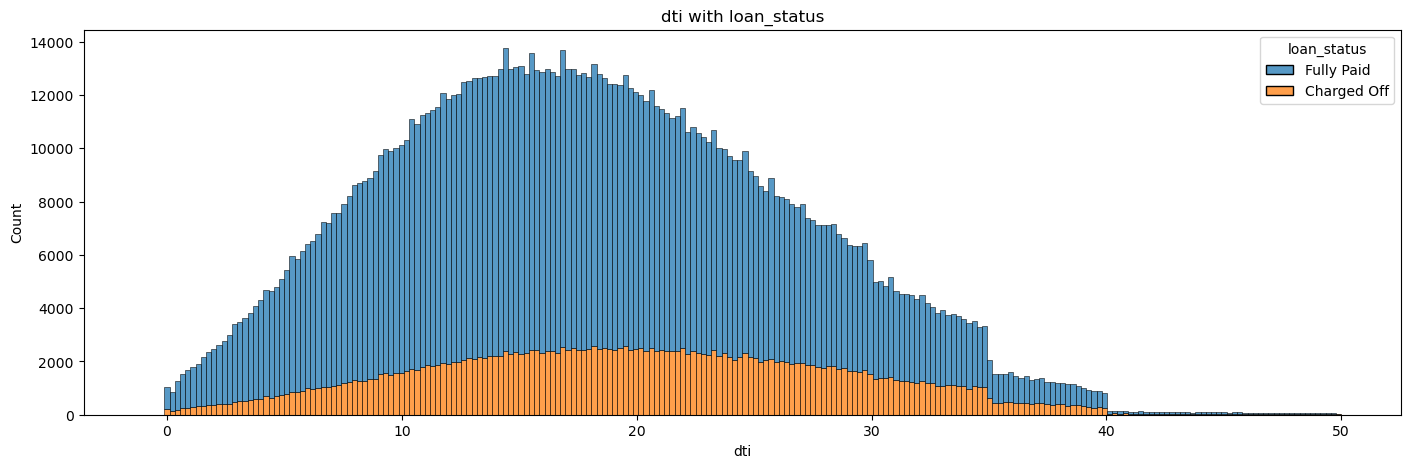

In [25]:
df = data[data['dti'] <= 50]
plt.figure(figsize = (17,5))
sns.histplot(data = df, x = 'dti', hue = 'loan_status', multiple = 'stack')
plt.title('dti with loan_status')


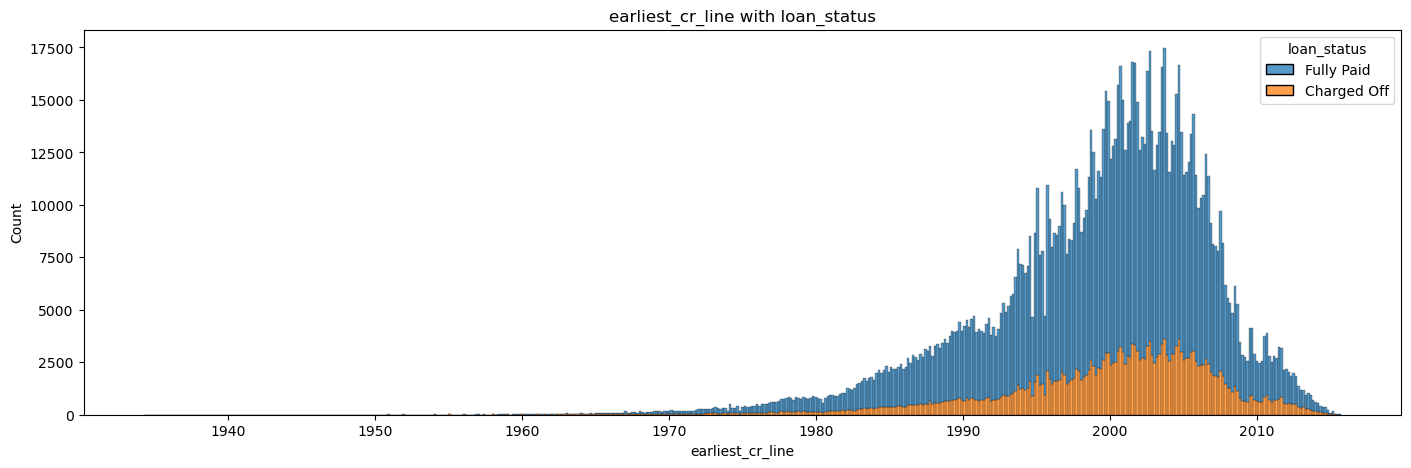

In [26]:
data['earliest_cr_line'] = pd.to_datetime(data['earliest_cr_line'], format='%b-%Y')
plt.figure(figsize = (17,5))
sns.histplot(data = data, x = 'earliest_cr_line', hue = 'loan_status', multiple = 'stack')
plt.title('earliest_cr_line with loan_status')
plt.show()

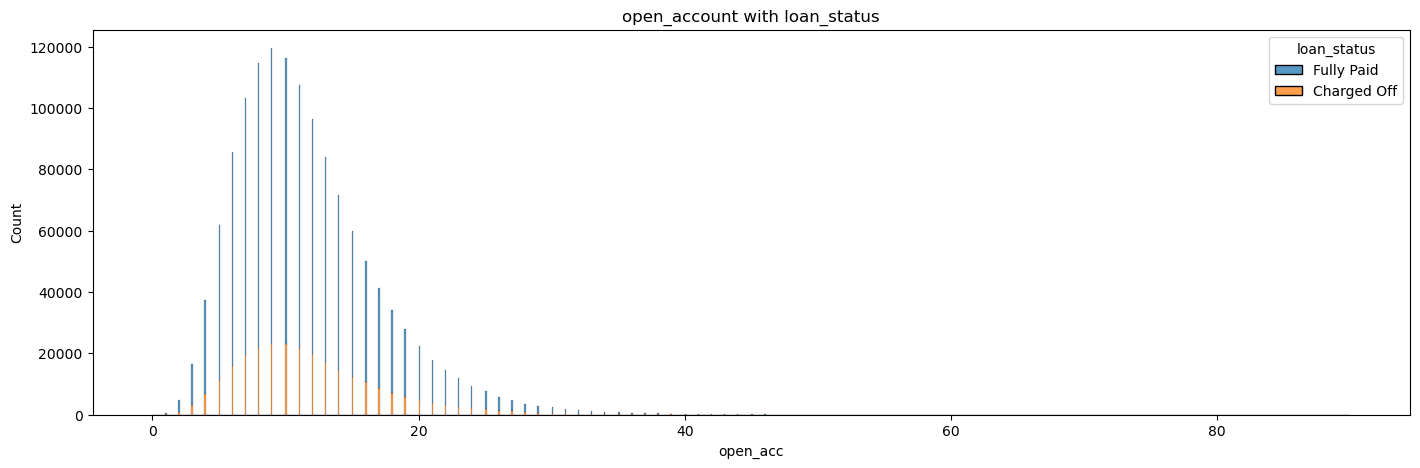

In [27]:

plt.figure(figsize = (17,5))
sns.histplot(data = data, x = 'open_acc', hue = 'loan_status', multiple = 'stack')
plt.title('open_account with loan_status')
plt.show()

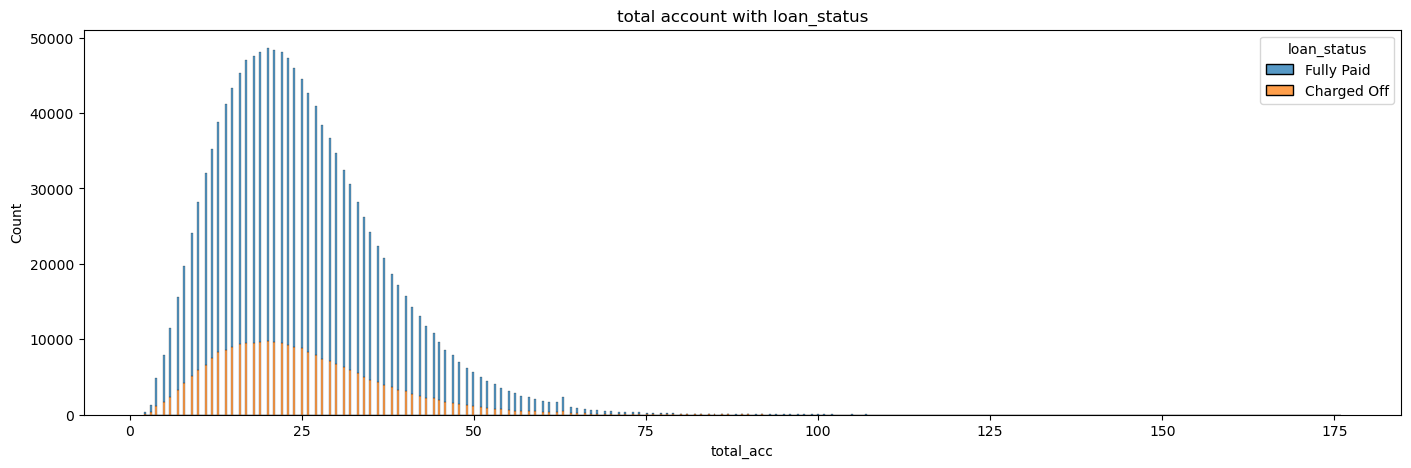

In [28]:
plt.figure(figsize = (17,5))
sns.histplot(data = data, x = 'total_acc', hue = 'loan_status', multiple = 'stack')
plt.title('total account with loan_status')
plt.show()

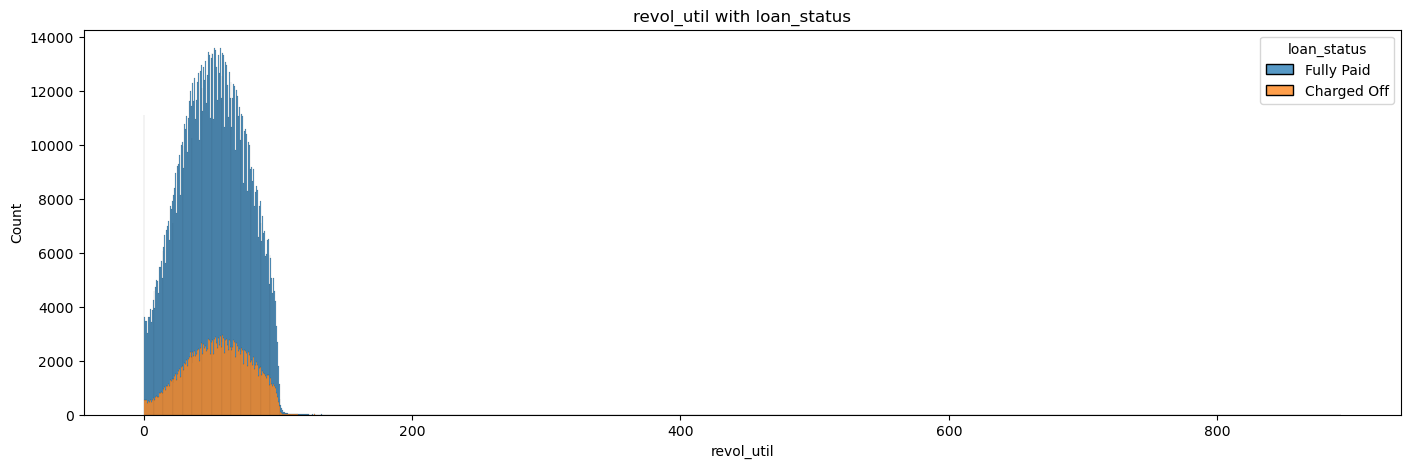

In [29]:
plt.figure(figsize = (17,5))
sns.histplot(data = data, x = 'revol_util', hue = 'loan_status', multiple = 'stack')
plt.title('revol_util with loan_status')
plt.show()

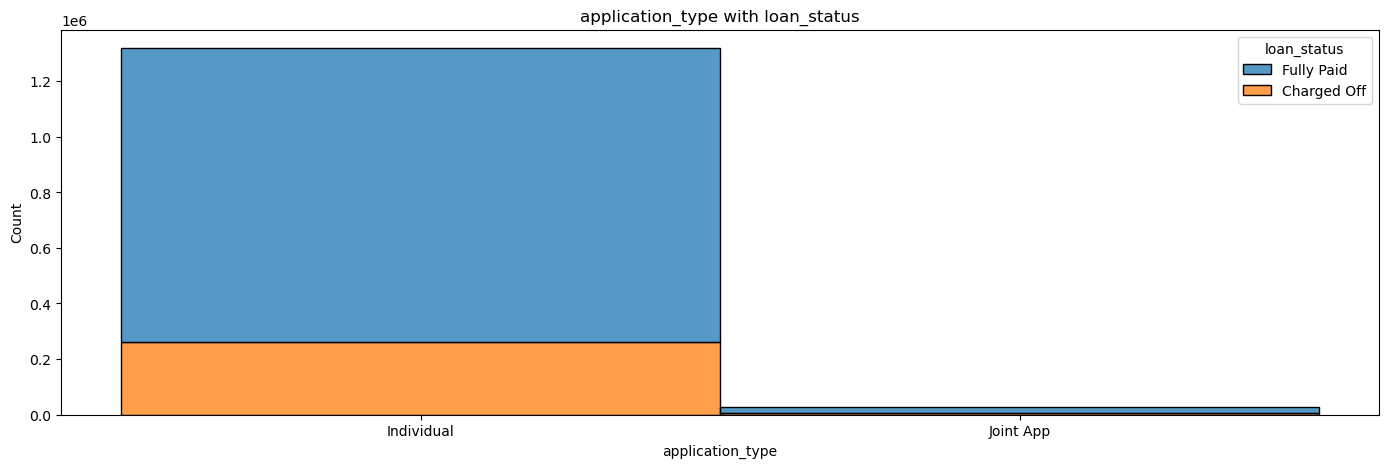

In [30]:
plt.figure(figsize = (17,5))
sns.histplot(data = data, x = 'application_type', hue = 'loan_status', multiple = 'stack')
plt.title('application_type with loan_status')
plt.show()

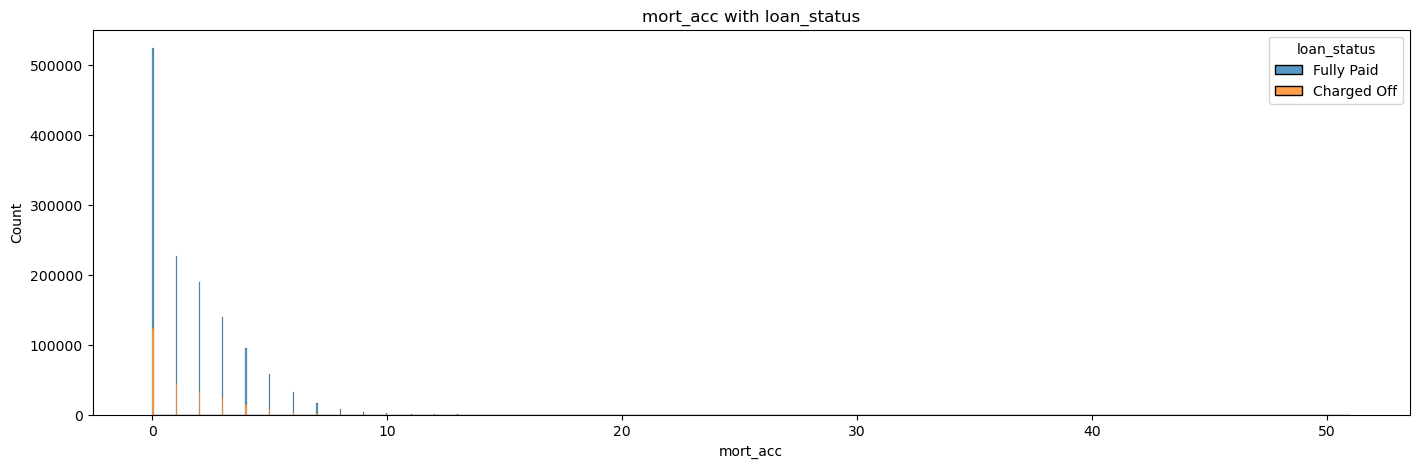

In [31]:
plt.figure(figsize = (17,5))
sns.histplot(data = data, x = 'mort_acc', hue = 'loan_status', multiple = 'stack')
plt.title('mort_acc with loan_status')
plt.show()

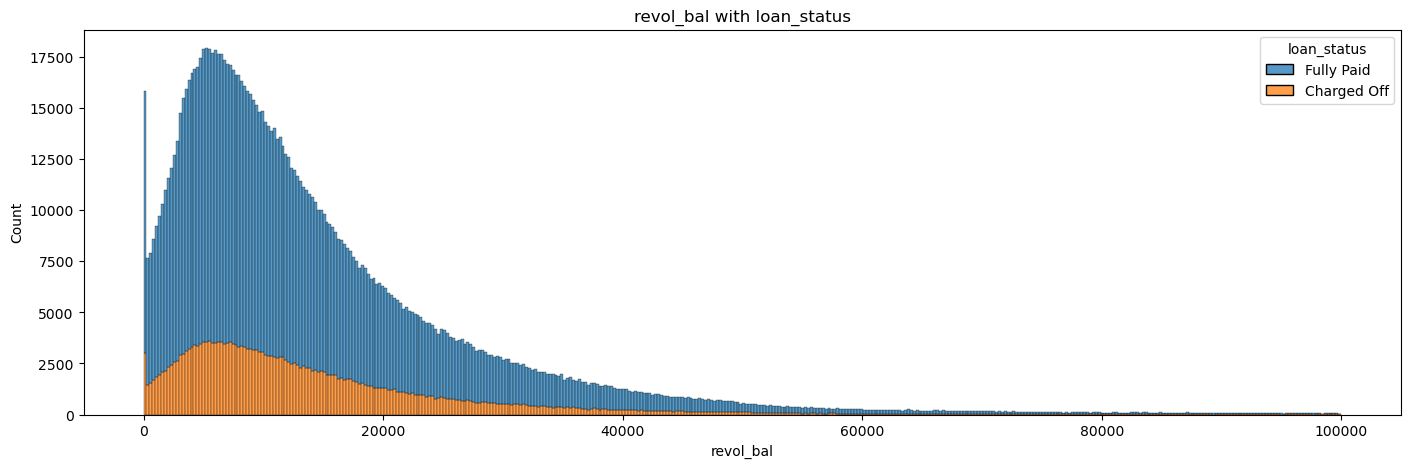

In [32]:
df = data[data['revol_bal'] <= 100000]
plt.figure(figsize = (17,5))
sns.histplot(data = df, x = 'revol_bal', hue = 'loan_status', multiple = 'stack')
plt.title('revol_bal with loan_status')
plt.show()

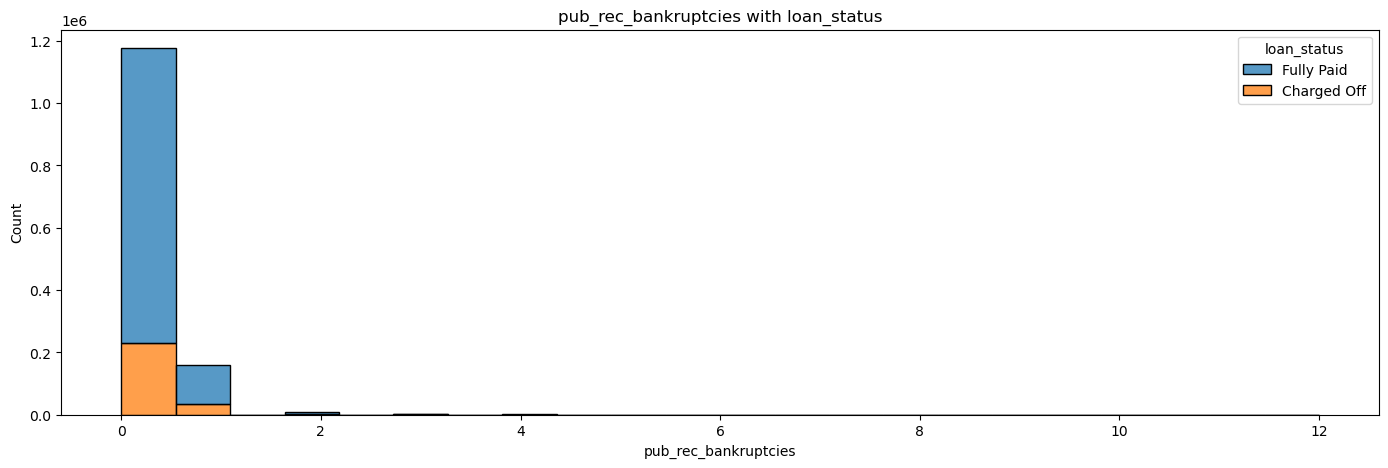

In [33]:
plt.figure(figsize = (17,5))
sns.histplot(data = data, x = 'pub_rec_bankruptcies', hue = 'loan_status', multiple = 'stack')
plt.title('pub_rec_bankruptcies with loan_status')
plt.show()

In [34]:
data['loan_status'] = data.loan_status.map({'Fully Paid' : 1, 'Charged Off' : 0})

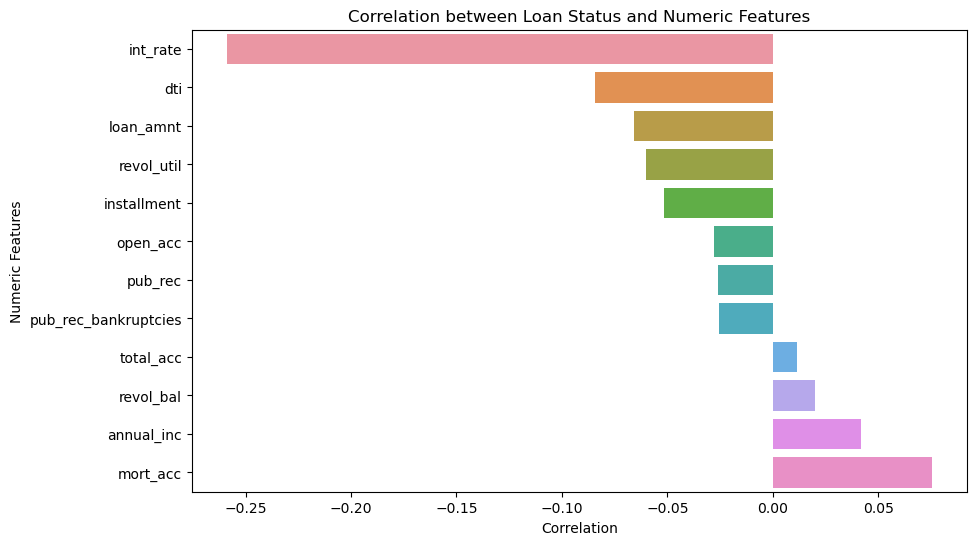

In [35]:
correlation = data.corr(numeric_only=True)['loan_status'].drop('loan_status').sort_values()

# Create a horizontal bar plot using Seaborn
plt.figure(figsize=(10, 6))
sns.barplot(x=correlation, y=correlation.index, orient='h')


plt.xlabel('Correlation')
plt.ylabel('Numeric Features')
plt.title('Correlation between Loan Status and Numeric Features')

plt.show()

we can see that interest rate has highly postive correlation with loan_status

# Data Preprocessing

In [315]:
main_df = data.copy()

In [316]:
for i in main_df.columns:
    if data[i].isna().sum() != 0:
        missing = data[i].isna().sum()
        perc = (missing/ main_df.shape[0]) * 100
        print("percentage of null values in ", i , " : ", perc)

percentage of null values in  emp_title  :  6.376597215511666
percentage of null values in  emp_length  :  5.8359039923883715
percentage of null values in  title  :  1.2383762850198095
percentage of null values in  zip_code  :  7.433231002519866e-05
percentage of null values in  dti  :  0.027800283949424295
percentage of null values in  revol_util  :  0.06370278969159525
percentage of null values in  mort_acc  :  3.5145059503014178
percentage of null values in  pub_rec_bankruptcies  :  0.05180962008756346


In [317]:
main_df.head()

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,title,zip_code,addr_state,dti,earliest_cr_line,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies
0,3600.0,36 months,13.99,123.03,C,C4,leadman,10+ years,MORTGAGE,55000.0,Not Verified,Dec-2015,1,debt_consolidation,Debt consolidation,190xx,PA,5.91,2003-08-01,7.0,0.0,2765.0,29.7,13.0,w,Individual,1.0,0.0
1,24700.0,36 months,11.99,820.28,C,C1,Engineer,10+ years,MORTGAGE,65000.0,Not Verified,Dec-2015,1,small_business,Business,577xx,SD,16.06,1999-12-01,22.0,0.0,21470.0,19.2,38.0,w,Individual,4.0,0.0
2,20000.0,60 months,10.78,432.66,B,B4,truck driver,10+ years,MORTGAGE,63000.0,Not Verified,Dec-2015,1,home_improvement,NaN,605xx,IL,10.78,2000-08-01,6.0,0.0,7869.0,56.2,18.0,w,Joint App,5.0,0.0
4,10400.0,60 months,22.45,289.91,F,F1,Contract Specialist,3 years,MORTGAGE,104433.0,Source Verified,Dec-2015,1,major_purchase,Major purchase,174xx,PA,25.37,1998-06-01,12.0,0.0,21929.0,64.5,35.0,w,Individual,6.0,0.0
5,11950.0,36 months,13.44,405.18,C,C3,Veterinary Tecnician,4 years,RENT,34000.0,Source Verified,Dec-2015,1,debt_consolidation,Debt consolidation,300xx,GA,10.20,1987-10-01,5.0,0.0,8822.0,68.4,6.0,w,Individual,0.0,0.0


In [318]:
#removing "months" from term column
main_df['term'] = main_df['term'].apply(lambda x: int(x.split()[0]))

In [319]:
# removing emp title column
main_df = main_df.drop(columns = ['emp_title'])

In [320]:
#removing title columne
main_df = main_df.drop(columns = ['title'])

In [321]:
#removing emp_length column
main_df = main_df.drop(columns = ['emp_length'])

In [322]:
##removing zipcode columne
main_df = main_df.drop(columns = ['zip_code'])

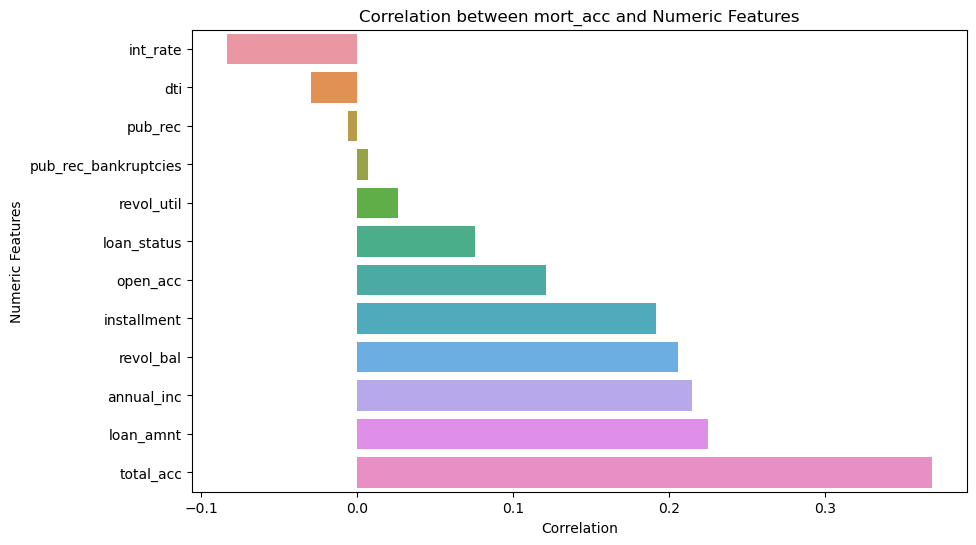

In [323]:
#mortage acc
correlation = data.corr(numeric_only=True)['mort_acc'].drop('mort_acc').sort_values()

# Create a horizontal bar plot using Seaborn
plt.figure(figsize=(10, 6))
sns.barplot(x=correlation, y=correlation.index, orient='h')


plt.xlabel('Correlation')
plt.ylabel('Numeric Features')
plt.title('Correlation between mort_acc and Numeric Features')

plt.show()

A strong corr bw mort acc and total acc

In [324]:
'''pip install fancyimpute'''

'pip install fancyimpute'

In [325]:
#filling na of mort_acc by MICE
mice_imputer = IterativeImputer()
imputed_column = mice_imputer.fit_transform(main_df[['mort_acc']])
imputed_column_df = pd.DataFrame(imputed_column, columns=['mort_acc'])
main_df['mort_acc'] = imputed_column

In [326]:
main_df.isna().sum()

loan_amnt                 0
term                      0
int_rate                  0
installment               0
grade                     0
sub_grade                 0
home_ownership            0
annual_inc                0
verification_status       0
issue_d                   0
loan_status               0
purpose                   0
addr_state                0
dti                     374
earliest_cr_line          0
open_acc                  0
pub_rec                   0
revol_bal                 0
revol_util              857
total_acc                 0
initial_list_status       0
application_type          0
mort_acc                  0
pub_rec_bankruptcies    697
dtype: int64

for dti, banckruptcies and revol until have very less nan, we can drop the rows

In [327]:
main_df.dropna(inplace=True)

In [328]:
main_df.shape

(1343383, 24)

In [329]:
main_df.dtypes

loan_amnt                      float64
term                             int64
int_rate                       float64
installment                    float64
grade                           object
sub_grade                       object
home_ownership                  object
annual_inc                     float64
verification_status             object
issue_d                         object
loan_status                      int64
purpose                         object
addr_state                      object
dti                            float64
earliest_cr_line        datetime64[ns]
open_acc                       float64
pub_rec                        float64
revol_bal                      float64
revol_util                     float64
total_acc                      float64
initial_list_status             object
application_type                object
mort_acc                       float64
pub_rec_bankruptcies           float64
dtype: object

## Handling categorical variables

In [330]:
print([i for i in main_df.columns if main_df[i].dtype == object])

['grade', 'sub_grade', 'home_ownership', 'verification_status', 'issue_d', 'purpose', 'addr_state', 'initial_list_status', 'application_type']


In [331]:
main_df.drop(columns = ['grade'], axis = 1, inplace = True)

In [332]:
dummies = ['sub_grade', 'home_ownership', 'verification_status', 'purpose', 'initial_list_status', 'application_type']
main_df = pd.get_dummies(main_df, columns = dummies, drop_first = True)
main_df.head()

,loan_amnt,term,int_rate,installment,annual_inc,issue_d,loan_status,addr_state,dti,earliest_cr_line,open_acc,pub_rec,revol_bal,revol_util,total_acc,mort_acc,pub_rec_bankruptcies,sub_grade_A2,sub_grade_A3,sub_grade_A4,sub_grade_A5,sub_grade_B1,sub_grade_B2,sub_grade_B3,sub_grade_B4,sub_grade_B5,sub_grade_C1,sub_grade_C2,sub_grade_C3,sub_grade_C4,sub_grade_C5,sub_grade_D1,sub_grade_D2,sub_grade_D3,sub_grade_D4,sub_grade_D5,sub_grade_E1,sub_grade_E2,sub_grade_E3,sub_grade_E4,sub_grade_E5,sub_grade_F1,sub_grade_F2,sub_grade_F3,sub_grade_F4,sub_grade_F5,sub_grade_G1,sub_grade_G2,sub_grade_G3,sub_grade_G4,sub_grade_G5,home_ownership_MORTGAGE,home_ownership_NONE,home_ownership_OTHER,home_ownership_OWN,home_ownership_RENT,verification_status_Source Verified,verification_status_Verified,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_house,purpose_major_purchase,purpose_medical,purpose_moving,purpose_other,purpose_renewable_energy,purpose_small_business,purpose_vacation,purpose_wedding,initial_list_status_w,application_type_Joint App
0,3600.0,36,13.99,123.03,55000.0,Dec-2015,1,PA,5.91,2003-08-01,7.0,0.0,2765.0,29.7,13.0,1.0,0.0,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,True,False
1,24700.0,36,11.99,820.28,65000.0,Dec-2015,1,SD,16.06,1999-12-01,22.0,0.0,21470.0,19.2,38.0,4.0,0.0,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,True,False
2,20000.0,60,10.78,432.66,63000.0,Dec-2015,1,IL,10.78,2000-08-01,6.0,0.0,7869.0,56.2,18.0,5.0,0.0,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,True,True
4,10400.0,60,22.45,289.91,104433.0,Dec-2015,1,PA,25.37,1998-06-01,12.0,0.0,21929.0,64.5,35.0,6.0,0.0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,True,False,False,False,False,True,False,False,False,False,False,False,True,False,False,False,False,False,False,False,True,False
5,11950.0,36,13.44,405.18,34000.0,Dec-2015,1,GA,10.20,1987-10-01,5.0,0.0,8822.0,68.4,6.0,0.0,0.0,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True,False,False,True,False,False,False,False,False,False,False,False,False,False,False,True,False


In [333]:
#removing zipcode since we will use addr_state
main_df.drop(columns = ['addr_state'], axis = 1, inplace = True)

In [334]:
#removing issue_d as it will cause data leakage
main_df.drop('issue_d', axis=1, inplace=True)

In [335]:
#extracting only the year from earlist_cr_line
main_df['earliest_cr_line'] = main_df.earliest_cr_line.dt.year
main_df['earliest_cr_line'].nunique()

72

In [336]:
main_df.shape

(1343383, 71)

In [337]:
main_df.columns

Index(['loan_amnt', 'term', 'int_rate', 'installment', 'annual_inc',
       'loan_status', 'dti', 'earliest_cr_line', 'open_acc', 'pub_rec',
       'revol_bal', 'revol_util', 'total_acc', 'mort_acc',
       'pub_rec_bankruptcies', 'sub_grade_A2', 'sub_grade_A3', 'sub_grade_A4',
       'sub_grade_A5', 'sub_grade_B1', 'sub_grade_B2', 'sub_grade_B3',
       'sub_grade_B4', 'sub_grade_B5', 'sub_grade_C1', 'sub_grade_C2',
       'sub_grade_C3', 'sub_grade_C4', 'sub_grade_C5', 'sub_grade_D1',
       'sub_grade_D2', 'sub_grade_D3', 'sub_grade_D4', 'sub_grade_D5',
       'sub_grade_E1', 'sub_grade_E2', 'sub_grade_E3', 'sub_grade_E4',
       'sub_grade_E5', 'sub_grade_F1', 'sub_grade_F2', 'sub_grade_F3',
       'sub_grade_F4', 'sub_grade_F5', 'sub_grade_G1', 'sub_grade_G2',
       'sub_grade_G3', 'sub_grade_G4', 'sub_grade_G5',
       'home_ownership_MORTGAGE', 'home_ownership_NONE',
       'home_ownership_OTHER', 'home_ownership_OWN', 'home_ownership_RENT',
       'verification_status_Source V

In [338]:
main_df.head()

,loan_amnt,term,int_rate,installment,annual_inc,loan_status,dti,earliest_cr_line,open_acc,pub_rec,revol_bal,revol_util,total_acc,mort_acc,pub_rec_bankruptcies,sub_grade_A2,sub_grade_A3,sub_grade_A4,sub_grade_A5,sub_grade_B1,sub_grade_B2,sub_grade_B3,sub_grade_B4,sub_grade_B5,sub_grade_C1,sub_grade_C2,sub_grade_C3,sub_grade_C4,sub_grade_C5,sub_grade_D1,sub_grade_D2,sub_grade_D3,sub_grade_D4,sub_grade_D5,sub_grade_E1,sub_grade_E2,sub_grade_E3,sub_grade_E4,sub_grade_E5,sub_grade_F1,sub_grade_F2,sub_grade_F3,sub_grade_F4,sub_grade_F5,sub_grade_G1,sub_grade_G2,sub_grade_G3,sub_grade_G4,sub_grade_G5,home_ownership_MORTGAGE,home_ownership_NONE,home_ownership_OTHER,home_ownership_OWN,home_ownership_RENT,verification_status_Source Verified,verification_status_Verified,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_house,purpose_major_purchase,purpose_medical,purpose_moving,purpose_other,purpose_renewable_energy,purpose_small_business,purpose_vacation,purpose_wedding,initial_list_status_w,application_type_Joint App
0,3600.0,36,13.99,123.03,55000.0,1,5.91,2003,7.0,0.0,2765.0,29.7,13.0,1.0,0.0,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,True,False
1,24700.0,36,11.99,820.28,65000.0,1,16.06,1999,22.0,0.0,21470.0,19.2,38.0,4.0,0.0,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,True,False
2,20000.0,60,10.78,432.66,63000.0,1,10.78,2000,6.0,0.0,7869.0,56.2,18.0,5.0,0.0,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,True,True
4,10400.0,60,22.45,289.91,104433.0,1,25.37,1998,12.0,0.0,21929.0,64.5,35.0,6.0,0.0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,True,False,False,False,False,True,False,False,False,False,False,False,True,False,False,False,False,False,False,False,True,False
5,11950.0,36,13.44,405.18,34000.0,1,10.20,1987,5.0,0.0,8822.0,68.4,6.0,0.0,0.0,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True,False,False,True,False,False,False,False,False,False,False,False,False,False,False,True,False


In [339]:
'''main_df = main_df.T.drop_duplicates()
main_df = main_df.T'''

'main_df = main_df.T.drop_duplicates()\nmain_df = main_df.T'

In [340]:
'''main_df.drop_duplicates(inplace = True)
print(main_df.shape)'''

'main_df.drop_duplicates(inplace = True)\nprint(main_df.shape)'

In [341]:
'''main_df.dtypes'''

'main_df.dtypes'

In [342]:
#making both categories to be equal amount in dataframe
fully_paid = main_df[main_df['loan_status'] == 1]
charged_off = main_df[main_df['loan_status'] == 0]

# Randomly select the same amount of samples from the 'Fully Paid' class
fully_paid_sample = fully_paid.sample(n=len(charged_off) + int(len(charged_off) * 0.2), random_state=42)

# Concatenate the selected 'Fully Paid' samples with the 'Charged Off' samples
balanced_df = pd.concat([fully_paid_sample, charged_off], ignore_index=True)

# Shuffle the DataFrame to ensure randomness
main_df = balanced_df.sample(frac=1, random_state=42).reset_index(drop=True)

In [343]:
main_df.shape

(590018, 71)

#Train Test Split

In [344]:
from sklearn.model_selection import train_test_split

In [345]:
train, test = train_test_split(main_df, test_size = 0.3, random_state = 1)
print(train.shape, test.shape)

(413012, 71) (177006, 71)


In [346]:
pd.set_option('display.max_columns', None)

In [347]:
train.head()

,loan_amnt,term,int_rate,installment,annual_inc,loan_status,dti,earliest_cr_line,open_acc,pub_rec,revol_bal,revol_util,total_acc,mort_acc,pub_rec_bankruptcies,sub_grade_A2,sub_grade_A3,sub_grade_A4,sub_grade_A5,sub_grade_B1,sub_grade_B2,sub_grade_B3,sub_grade_B4,sub_grade_B5,sub_grade_C1,sub_grade_C2,sub_grade_C3,sub_grade_C4,sub_grade_C5,sub_grade_D1,sub_grade_D2,sub_grade_D3,sub_grade_D4,sub_grade_D5,sub_grade_E1,sub_grade_E2,sub_grade_E3,sub_grade_E4,sub_grade_E5,sub_grade_F1,sub_grade_F2,sub_grade_F3,sub_grade_F4,sub_grade_F5,sub_grade_G1,sub_grade_G2,sub_grade_G3,sub_grade_G4,sub_grade_G5,home_ownership_MORTGAGE,home_ownership_NONE,home_ownership_OTHER,home_ownership_OWN,home_ownership_RENT,verification_status_Source Verified,verification_status_Verified,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_house,purpose_major_purchase,purpose_medical,purpose_moving,purpose_other,purpose_renewable_energy,purpose_small_business,purpose_vacation,purpose_wedding,initial_list_status_w,application_type_Joint App
527356,5000.0,36,12.99,168.45,45000.0,0,18.99,2009,6.0,0.0,1816.0,36.3,10.0,0.0,0.0,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True,False,False,True,False,False,False,False,False,False,False,False,False,False,False,True,False
269932,4625.0,36,15.61,161.72,30000.0,1,1.00,1995,2.0,0.0,2091.0,83.6,9.0,2.0,0.0,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,True,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False
347005,9600.0,36,15.61,335.67,80000.0,0,11.45,1990,14.0,1.0,15170.0,51.1,24.0,0.0,1.0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False
274407,5500.0,36,15.61,192.31,160000.0,1,10.94,1996,12.0,0.0,3908.0,71.1,21.0,1.0,0.0,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,True,False,False,True,False,False,False,False,False,False,False,False,False,False,False,True,False
567366,10000.0,36,15.80,350.59,72000.0,0,14.15,1989,15.0,0.0,24211.0,73.1,38.0,5.0,0.0,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,True,False,True,False,False,False,False,False,False,False,False,False,False,False,True,False


In [348]:
#handling outliers

train = train[train['annual_inc'] <= 250000]
train = train[train['dti'] <= 50]
train = train[train['open_acc'] <= 40]
train = train[train['total_acc'] <= 80]
train = train[train['revol_util'] <= 120]
train = train[train['revol_bal'] <= 250000]

print(train.shape)

(407238, 71)


In [349]:
#normalizing data
x_train, y_train = train.drop('loan_status', axis = 1), train.loan_status
x_test, y_test = test.drop('loan_status', axis = 1), test.loan_status

In [350]:
x_train.shape

(407238, 70)

In [351]:
x_train = np.array(x_train).astype(np.float32)
x_test = np.array(x_test).astype(np.float32)
y_train = np.array(y_train).astype(np.float32)
y_test = np.array(y_test).astype(np.float32)

In [352]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [353]:
joblib.dump(scaler, 'min_max_scaler.joblib')

['min_max_scaler.joblib']

# XG Boost

In [354]:
'''pip install xgboost'''

'pip install xgboost'

In [368]:
import xgboost as xgb
from sklearn.metrics import accuracy_score

In [369]:
dtrain = xgb.DMatrix(x_train, label=y_train)
dtest = xgb.DMatrix(x_test, label=y_test)

In [370]:
params = {
    'objective': 'binary:logistic',
    'max_depth': 70,
    'learning_rate': 0.1,
    'eval_metric': 'auc'
}

In [371]:
num_rounds = 100
xg_model = xgb.train(params, dtrain, num_rounds)

In [372]:
y_pred_probs

array([0.3364931 , 0.9871366 , 0.5627808 , ..., 0.972644  , 0.42414263,
       0.35615465], dtype=float32)

In [391]:
y_pred_probs = xg_model.predict(dtest)
y_pred_binary = (y_pred_probs > 0.5).astype(int)

In [392]:
from sklearn.metrics import roc_auc_score
auc_score = roc_auc_score(y_test, y_pred_probs)

print("AUC: {:.4f}".format(auc_score))

AUC: 0.6964


In [393]:
report = classification_report(y_test, y_pred_binary)
print(report)

              precision    recall  f1-score   support

         0.0       0.62      0.57      0.59     80324
         1.0       0.66      0.70      0.68     96682

    accuracy                           0.64    177006
   macro avg       0.64      0.64      0.64    177006
weighted avg       0.64      0.64      0.64    177006



In [376]:
joblib.dump(xg_model, 'xgBoost_model.joblib')

['xgBoost_model.joblib']

# ANN model

In [377]:
x_train.shape, y_train.shape

((407238, 70), (407238,))

In [378]:
import tensorflow as tf
from tensorflow.keras.layers import Input, Dense, BatchNormalization, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.metrics import AUC
from sklearn.metrics import classification_report
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping

In [379]:
i = Input(shape=(x_train.shape[1],))

x = Dense(1024, activation = 'relu')(i)
x = BatchNormalization()(x)
x = Dropout(0.1)(x)

x = Dense(512, activation = 'relu')(x)
x = BatchNormalization()(x)
x = Dropout(0.1)(x)

x = Dense(264, activation = 'relu')(x)
x = BatchNormalization()(x)
x = Dropout(0.1)(x)

x = Dense(1, activation = 'sigmoid')(x)

model = Model(i, x)

In [380]:
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
model.compile(optimizer = Adam(0.001), loss = 'binary_crossentropy', metrics = [AUC(name = 'AUC')])

In [381]:
model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 70)]              0         
                                                                 
 dense_7 (Dense)             (None, 1024)              72704     
                                                                 
 batch_normalization_6 (Bat  (None, 1024)              4096      
 chNormalization)                                                
                                                                 
 dropout_5 (Dropout)         (None, 1024)              0         
                                                                 
 dense_8 (Dense)             (None, 512)               524800    
                                                                 
 batch_normalization_7 (Bat  (None, 512)               2048      
 chNormalization)                                          

In [382]:
r = model.fit(x_train, y_train, epochs = 40, batch_size = 64 ,validation_data = (x_test, y_test), callbacks=[early_stopping])

Epoch 1/40
6364/6364 [==============================] - 44s 7ms/step - loss: 0.6328 - AUC: 0.6934 - val_loss: 0.6238 - val_AUC: 0.7056
Epoch 2/40
2293/6364 [=========>....................] - ETA: 24s - loss: 0.6248 - AUC: 0.7014

KeyboardInterrupt: 

In [ ]:
plt.plot(r.history['AUC'], label = 'AUC')
plt.plot(r.history['val_AUC'], label = 'val_AUC')
plt.legend()

In [ ]:
y_test_pred = model.predict(x_test).round()

In [ ]:
y_test_pred

In [ ]:
report = classification_report(y_test, y_test_pred)
print(report)

In [ ]:
#exporting
model.save('ANN_model.h5')

# Logistic Regression

In [307]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [308]:
logreg_model = LogisticRegression(
    penalty='l2',       # Regularization type ('l2' for ridge, 'l1' for lasso)
    C=1.0,              # Inverse of regularization strength (smaller values for stronger regularization)
    random_state=42
)

In [309]:
logreg_model.fit(x_train, y_train)

C:\Users\Vinay\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(random_state=42)

In [310]:
y_pred_logreg = logreg_model.predict(x_test)

In [312]:
step_factor = 0.05 
threshold_value = 0.2 
roc_score=0
predicted_proba = logreg_model.predict_proba(x_test) #probability of prediction
while threshold_value <=0.8: #continue to check best threshold upto probability 0.8
    temp_thresh = threshold_value
    predicted = (predicted_proba [:,1] >= temp_thresh).astype('int') #change the class boundary for prediction
    print('Threshold',temp_thresh,'--',roc_auc_score(y_test, predicted))
    if roc_score<roc_auc_score(y_test, predicted): #store the threshold for best classification
        roc_score = roc_auc_score(y_test, predicted)
        thrsh_score = threshold_value
    threshold_value = threshold_value + step_factor
print('---Optimum Threshold ---',thrsh_score,'--ROC--',roc_score)

Threshold 0.2 -- 0.5000682219370315
Threshold 0.25 -- 0.5001457552606929
Threshold 0.3 -- 0.5002543001823057
Threshold 0.35 -- 0.5010389407653524
Threshold 0.39999999999999997 -- 0.5037572619210625
Threshold 0.44999999999999996 -- 0.51137878215386
Threshold 0.49999999999999994 -- 0.5243623912705538
Threshold 0.5499999999999999 -- 0.5428041397457464
Threshold 0.6 -- 0.5658138127361776
Threshold 0.65 -- 0.5907472217558972
Threshold 0.7000000000000001 -- 0.6167822019016758
Threshold 0.7500000000000001 -- 0.6389126278589429
---Optimum Threshold --- 0.7500000000000001 --ROC-- 0.6389126278589429


In [ ]:
accuracy_logreg

In [ ]:
import joblib

In [ ]:
joblib.dump(logreg_model, 'logreg_model.pkl')

# Random Forest Classifier


In [300]:
from sklearn.ensemble import RandomForestClassifier

In [301]:
rf_classifier = RandomForestClassifier(random_state=42)

In [302]:
rf_classifier = RandomForestClassifier(
    n_estimators=50,  # Number of trees in the forest
    max_depth=72,    # Maximum depth of the tree
    min_samples_split=2,  # Minimum number of samples required to split an internal node
    min_samples_leaf=1,   # Minimum number of samples required to be at a leaf node
    random_state=42
)

In [303]:
rf_classifier.fit(x_train, y_train)

RandomForestClassifier(max_depth=72, n_estimators=50, random_state=42)

In [304]:
y_pred_rf = rf_classifier.predict(x_test)

In [305]:
class_report = classification_report(y_test, y_pred_rf)
print("Classification Report:")
print(class_report)

Classification Report:
              precision    recall  f1-score   support

         0.0       0.50      0.10      0.17     80609
         1.0       0.81      0.97      0.89    322406

    accuracy                           0.80    403015
   macro avg       0.66      0.54      0.53    403015
weighted avg       0.75      0.80      0.74    403015



In [306]:
step_factor = 0.05 
threshold_value = 0.2 
roc_score=0
predicted_proba = rf_classifier.predict_proba(x_test) #probability of prediction
while threshold_value <=0.8: #continue to check best threshold upto probability 0.8
    temp_thresh = threshold_value
    predicted = (predicted_proba [:,1] >= temp_thresh).astype('int') #change the class boundary for prediction
    print('Threshold',temp_thresh,'--',roc_auc_score(y_test, predicted))
    if roc_score<roc_auc_score(y_test, predicted): #store the threshold for best classification
        roc_score = roc_auc_score(y_test, predicted)
        thrsh_score = threshold_value
    threshold_value = threshold_value + step_factor
print('---Optimum Threshold ---',thrsh_score,'--ROC--',roc_score)

Threshold 0.2 -- 0.5000248111253086
Threshold 0.25 -- 0.50034735055978
Threshold 0.3 -- 0.5010947744548638
Threshold 0.35 -- 0.5041433823171144
Threshold 0.39999999999999997 -- 0.5083162051915654
Threshold 0.44999999999999996 -- 0.5195584251512778
Threshold 0.49999999999999994 -- 0.5306517050584036
Threshold 0.5499999999999999 -- 0.5532086333062387
Threshold 0.6 -- 0.5709164808330971
Threshold 0.65 -- 0.5984899417916568
Threshold 0.7000000000000001 -- 0.6241840904295304
Threshold 0.7500000000000001 -- 0.6362479425250285
---Optimum Threshold --- 0.7500000000000001 --ROC-- 0.6362479425250285


In [159]:
joblib.dump(rf_classifier, 'rf_clf_model.joblib')

['rf_clf_model.joblib']

# Decision Tree

In [221]:
from sklearn.tree import DecisionTreeClassifier

In [224]:
dt_classifier = DecisionTreeClassifier(
    criterion='entropy',       # Split criterion ('gini' for Gini impurity, 'entropy' for information gain)
    max_depth=None,         # Maximum depth of the tree (None means nodes are expanded until all leaves are pure or contain less than min_samples_split samples)
    min_samples_split=2,    # Minimum number of samples required to split an internal node
    min_samples_leaf=1,     # Minimum number of samples required to be at a leaf node
    random_state=42
)

In [225]:
dt_classifier.fit(x_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=42)

In [226]:
y_pred_dt = dt_classifier.predict(x_test)

In [228]:
accuracy_dt = accuracy_score(y_test, y_pred_dt)
print("Best Model Accuracy:", accuracy_dt)

Best Model Accuracy: 0.5699128843090064


In [227]:
class_report_dt = classification_report(y_test, y_pred_dt)
print("Classification Report:")
print(class_report_dt)

Classification Report:
              precision    recall  f1-score   support

         0.0       0.53      0.53      0.53     80324
         1.0       0.61      0.60      0.61     96682

    accuracy                           0.57    177006
   macro avg       0.57      0.57      0.57    177006
weighted avg       0.57      0.57      0.57    177006



In [ ]:
joblib.dump(dt_classifier, 'dt_clf_model.pkl')

main_df.dtype

In [ ]:
print(main_df.dtypes)